In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
directory = 'in_clean_fill_norm_2'
files = os.listdir(directory)

data = []
for file in files:
    file_path = os.path.join(directory, file)
    if os.path.isfile(file_path):
        array = np.loadtxt(file_path)
        data.append(array)

x_in = np.array(data)


In [54]:
x_in_r = x_in.reshape(-1,10,8,8)
# for the shape of (-1, 10, 8, 8) sum the 8x8 array row-wise)
x_in_r = x_in_r.sum(axis=3)
x_in_r = x_in_r.reshape(-1, 10, 8)

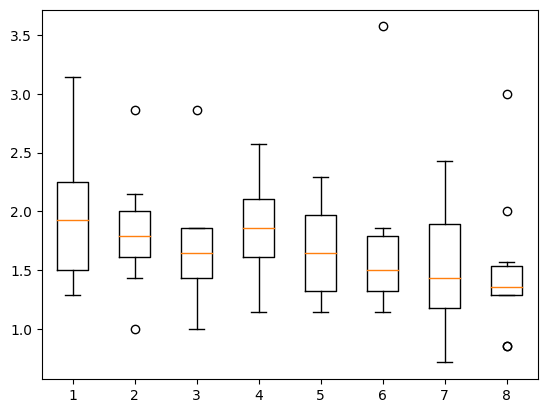

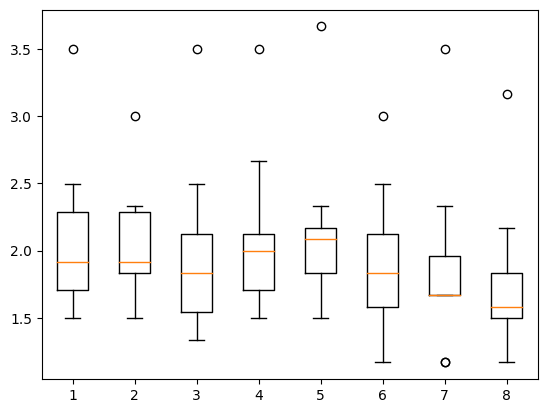

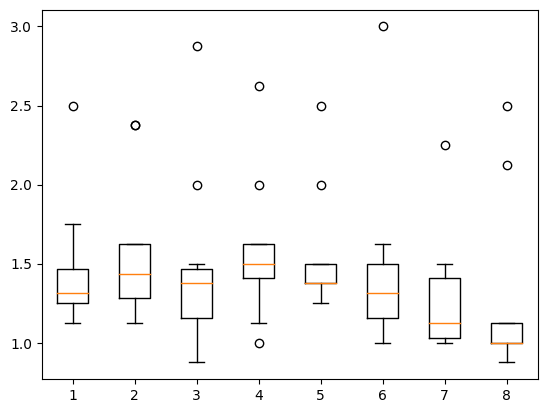

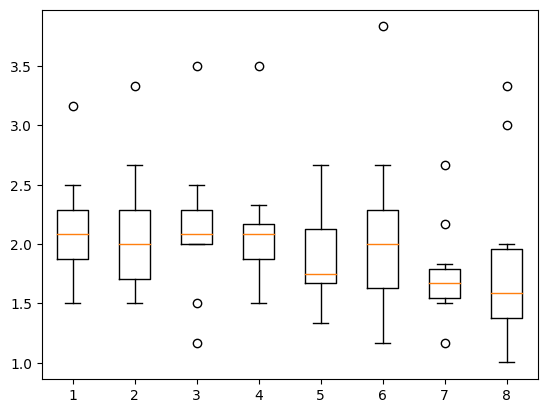

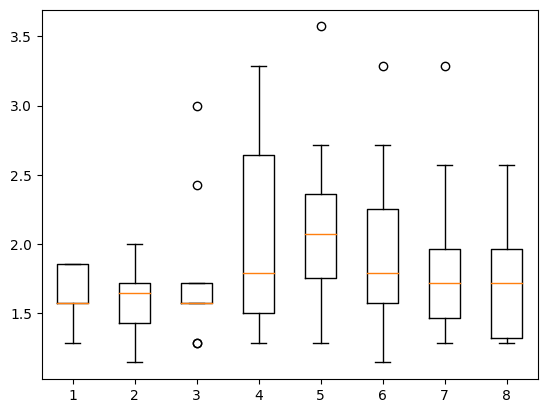

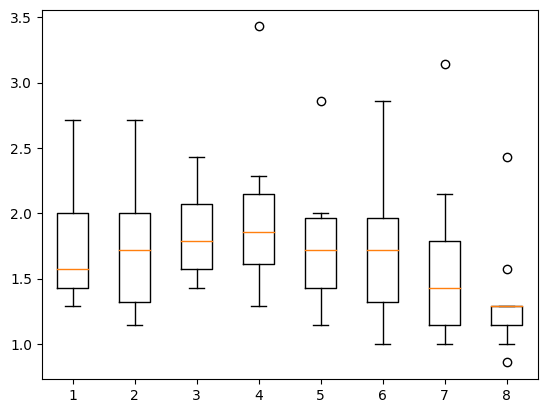

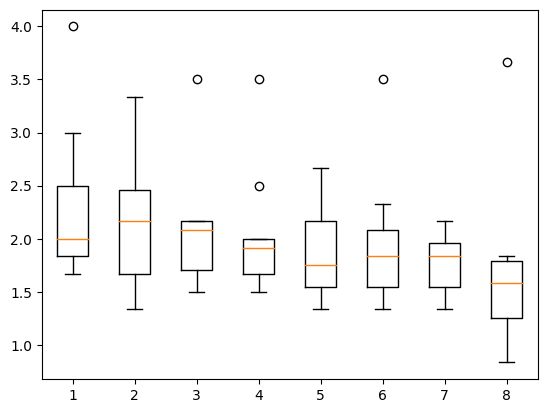

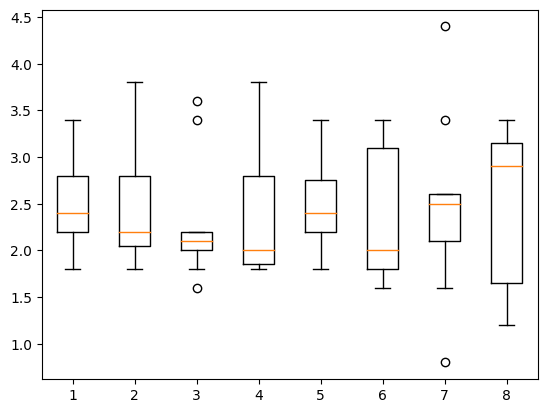

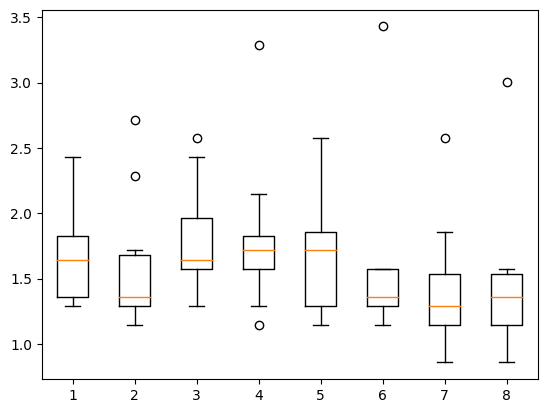

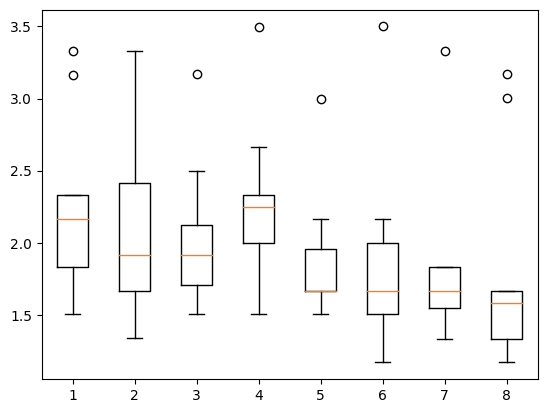

In [55]:
# boxplot of the sum of the 8x8 array row-wise
for i in range(10):
    plt.boxplot(x_in_r[i])
    plt.show()


In [24]:
directory = 'out_clean_fill_norm_2'
files = os.listdir(directory)

data = []
for file in files:
    file_path = os.path.join(directory, file)
    if os.path.isfile(file_path):
        array = np.loadtxt(file_path)
        data.append(array)

x_out = np.array(data)

In [28]:
directory = 'no_clean_fill_norm_2'
# all the txt files in the directory
files = [file for file in os.listdir(directory) if file.endswith('.txt')]

data = []
for file in files:
    file_path = os.path.join(directory, file)
    if os.path.isfile(file_path):
        try:
            array = np.loadtxt(file_path)
        except:
            print(file_path)
            break
        data.append(array)

x_no = np.array(data)

In [29]:
directory = 'no_small_room_fill'
files = os.listdir(directory)

data = []
for file in files:
    file_path = os.path.join(directory, file)
    if os.path.isfile(file_path):
        array = np.loadtxt(file_path)
        data.append(array)

x_no_small_room = np.array(data)

In [30]:
x_no = np.concatenate((x_no, x_no_small_room), axis=0)

In [31]:
ys_in = np.zeros(x_in.shape[0])
ys_out = np.ones(x_out.shape[0])
ys_no = np.ones(x_no.shape[0]) * 2


In [32]:
x = np.concatenate((x_in, x_out, x_no))
ys = np.concatenate((ys_in, ys_out, ys_no))


In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, ys, test_size=0.2, random_state=42)

In [34]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

In [35]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [40]:
y_pred = clf.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.973421926910299


In [42]:
feature_importances = clf.feature_importances_

In [43]:
zero_indices = np.where(feature_importances != 0)[0]
print(zero_indices)


[  3   4   5  10  11  12  13  18  20  21  23  25  26  28  29  30  31  35
  36  53  54  65  67  74  75  76  77  81  82  83  91  92  93  99 100 114
 115 116 117 123 124 127 131 132 138 139 140 142 145 147 148 154 155 157
 161 164 165 172 175 176 178 179 180 186 187 188 194 195 196 201 203 204
 207 211 212 214 217 219 222 227 229 232 235 243 244 245 251 252 259 260
 261 264 267 271 274 281 282 297 299 300 303 309 312 314 315 323 330 332
 336 338 339 341 347 362 376 378 387 388 389 394 395 396 403 404 405 409
 413 414 427 428 430 431 435 436 437 438 443 444 445 450 451 452 458 459
 460 461 466 467 468 473 476 484 486 490 491 499 500 501 506 507 508 509
 515 516 517 521 522 524 525 531 532 536 539 540 547 548 555 561 563 565
 568 571 572 576 578 580 581 586 589 594 595 596 597 601 602 603 604 605
 610 611 613 619 639]


In [44]:
zero_indices = np.where(feature_importances != 0)[0]
zero_indices

array([  3,   4,   5,  10,  11,  12,  13,  18,  20,  21,  23,  25,  26,
        28,  29,  30,  31,  35,  36,  53,  54,  65,  67,  74,  75,  76,
        77,  81,  82,  83,  91,  92,  93,  99, 100, 114, 115, 116, 117,
       123, 124, 127, 131, 132, 138, 139, 140, 142, 145, 147, 148, 154,
       155, 157, 161, 164, 165, 172, 175, 176, 178, 179, 180, 186, 187,
       188, 194, 195, 196, 201, 203, 204, 207, 211, 212, 214, 217, 219,
       222, 227, 229, 232, 235, 243, 244, 245, 251, 252, 259, 260, 261,
       264, 267, 271, 274, 281, 282, 297, 299, 300, 303, 309, 312, 314,
       315, 323, 330, 332, 336, 338, 339, 341, 347, 362, 376, 378, 387,
       388, 389, 394, 395, 396, 403, 404, 405, 409, 413, 414, 427, 428,
       430, 431, 435, 436, 437, 438, 443, 444, 445, 450, 451, 452, 458,
       459, 460, 461, 466, 467, 468, 473, 476, 484, 486, 490, 491, 499,
       500, 501, 506, 507, 508, 509, 515, 516, 517, 521, 522, 524, 525,
       531, 532, 536, 539, 540, 547, 548, 555, 561, 563, 565, 56

In [45]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
precision_recall_matrix = pd.DataFrame({'Precision': precision, 'Recall': recall}, index=['Class 0', 'Class 1', 'Class 2'])
print(precision_recall_matrix)


         Precision    Recall
Class 0   0.960000  0.960000
Class 1   0.957447  0.957447
Class 2   1.000000  1.000000


In [46]:
zero_indices = np.where(feature_importances != 0)

In [47]:
len(zero_indices[0])

203